## Get Data

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as ny
import requests
import qgrid
from itables import show
from jqdatasdk import *
auth('13625744156', '744156')
is_auth
plt.rcParams['font.family'] = ['Heiti TC']

In [5]:
stocklist = get_all_securities()
stocklist.shape  # 4298, 5
stocklist.columns

Index(['display_name', 'name', 'start_date', 'end_date', 'type'], dtype='object')

In [6]:
# get index 
all_securities_index = get_all_securities(['index'])
display(all_securities_index)

,display_name,name,start_date,end_date,type
000001.XSHG,上证指数,SZZS,1991-07-15,2200-01-01,index
000002.XSHG,A股指数,AGZS,1992-02-21,2200-01-01,index
000003.XSHG,B股指数,BGZS,1992-02-21,2200-01-01,index
000004.XSHG,工业指数,GYZS,1993-05-03,2200-01-01,index
000005.XSHG,商业指数,SYZS,1993-05-03,2200-01-01,index
...,...,...,...,...,...
399994.XSHE,中证信息安全主题指数,XXAQ,2015-03-12,2200-01-01,index
399995.XSHE,中证基建工程指数,JJGC,2015-03-12,2200-01-01,index
399996.XSHE,中证智能家居指数,ZNJJ,2014-09-17,2200-01-01,index
399997.XSHE,中证白酒指数,ZZBJ,2015-01-21,2200-01-01,index


<AxesSubplot:>

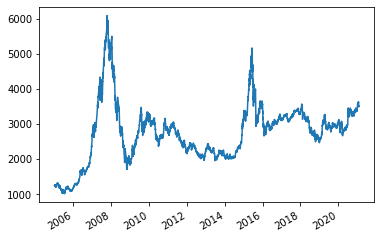

In [57]:
xshg = get_price('000001.XSHG', start_date='2000-01-01', end_date='2021-02-01')
xshg['close'].plot()
# structural break
# 2005 to 2007
# 2007 to 2009
# 2009 to 2015
# 2015 to 2016 
# 2016 to now 

# before 2010: analyze why it reaches to 6000
# after 2010: analyze why it reacers to 5000 again in 2015
# after 2012: pin down the new features of Chinese Stockmarket

In [39]:
xshg.head()

,open,close,high,low,volume,money
2005-01-04,1260.78,1242.77,1260.78,1238.18,816177000.0,4.418452e+09
2005-01-05,1241.68,1251.94,1258.58,1235.75,867865100.0,4.916589e+09
2005-01-06,1252.49,1239.43,1252.73,1234.24,792225400.0,4.381370e+09
2005-01-07,1239.32,1244.75,1256.31,1235.51,894087100.0,5.040042e+09
2005-01-10,1243.58,1252.40,1252.72,1236.09,723468300.0,4.118292e+09


In [40]:
xshg.tail()

,open,close,high,low,volume,money
2021-01-26,3610.97,3569.43,3610.97,3564.74,2.781399e+10,4.363267e+11
2021-01-27,3567.55,3573.34,3578.80,3546.49,2.641072e+10,3.962704e+11
2021-01-28,3534.67,3505.18,3549.54,3496.88,2.708625e+10,3.915744e+11
2021-01-29,3521.72,3483.07,3531.60,3446.55,2.936627e+10,4.165286e+11
2021-02-01,3477.17,3505.28,3506.39,3469.88,2.775679e+10,3.714731e+11


## Stock Market After 2016

In [7]:
all_securities_index['display_name']

000001.XSHG          上证指数
000002.XSHG          A股指数
000003.XSHG          B股指数
000004.XSHG          工业指数
000005.XSHG          商业指数
                  ...    
399994.XSHE    中证信息安全主题指数
399995.XSHE      中证基建工程指数
399996.XSHE      中证智能家居指数
399997.XSHE        中证白酒指数
399998.XSHE        中证煤炭指数
Name: display_name, Length: 697, dtype: object

In [51]:
# Index
# 沪深300, 上证指数, 上证A股指数, 中证500, 上证50, 红利指数
index_name = ['沪深300', '上证指数', 'A股指数', '中证500', '上证50', '红利指数']
key_index = all_securities_index[all_securities_index.display_name.isin(index_name)]  # `isin` is very useful function

In [63]:
display(key_index)
# 399905.XSHE is listed in Shenzhen stock market
# 000905.XSHG is listed in Shanghai stock market
# creat a dictionary
index_dict = {a:b for a, b in zip(key_index.index, key_index['display_name'])}
print(index_dict)

,display_name,name,start_date,end_date,type
000001.XSHG,上证指数,SZZS,1991-07-15,2200-01-01,index
000002.XSHG,A股指数,AGZS,1992-02-21,2200-01-01,index
000015.XSHG,红利指数,HLZS,2005-01-04,2200-01-01,index
000016.XSHG,上证50,SZ50,2004-01-02,2200-01-01,index
000300.XSHG,沪深300,HS300,2005-04-08,2200-01-01,index
000905.XSHG,中证500,ZZ500,2007-01-15,2200-01-01,index
399300.XSHE,沪深300,HS300,2005-04-08,2200-01-01,index
399905.XSHE,中证500,ZZ500,2007-01-15,2200-01-01,index


{'000001.XSHG': '上证指数', '000002.XSHG': 'A股指数', '000015.XSHG': '红利指数', '000016.XSHG': '上证50', '000300.XSHG': '沪深300', '000905.XSHG': '中证500', '399300.XSHE': '沪深300', '399905.XSHE': '中证500'}


In [71]:
for item in index_dict:
    print(item)
    print(index_dict[item])

000001.XSHG
上证指数
000002.XSHG
A股指数
000015.XSHG
红利指数
000016.XSHG
上证50
000300.XSHG
沪深300
000905.XSHG
中证500
399300.XSHE
沪深300
399905.XSHE
中证500


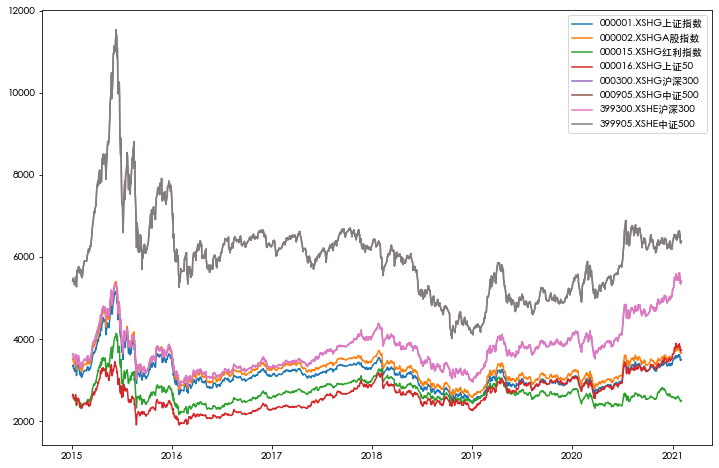

In [79]:
# plot index data
fig, ax = plt.subplots(figsize=(12, 8))
for item in index_dict:
    temp = get_price(item, end_date='2021-02-01')  # only plot 
    ax.plot(temp['close'], label=item+index_dict[item])
ax.legend()

Focus one the folloing indexes:

中证500指数由全部A股中剔除沪深300指数成份股及总市值排名前300名的股票后，总市值排名靠前的500只股票组成，综合反映中国A股市场中一批中小市值公司的股票价格表现。

沪深300指数由上海和深圳证券市场中市值大、流动性好的300只股票组成，综合反映中国A股市场上市股票价格的整体表现。

上证A股指数由上海证券交易所上市的符合条件的A股组成样本股，反映上海市场A股的股价整体表现。

__remark__: 红利指数一直运行平稳，2020年疫情后现金流收缩，股价走跌，但是其余指数走高。

## Bond Market after 2016

Link: https://www.joinquant.com/view/community/detail/c2816f98b81e57642c8511effb016a7b

In [99]:
def bond_china_yield(start_date="2019-02-04", end_date="2020-02-04"):
    """
    中国债券信息网-国债及其他债券收益率曲线
    https://www.chinabond.com.cn/
    http://yield.chinabond.com.cn/cbweb-pbc-web/pbc/historyQuery?startDate=2019-02-07&endDate=2020-02-04&gjqx=0&qxId=ycqx&locale=cn_ZH
    注意: end_date - start_date 应该小于一年
    :param start_date: 需要查询的日期, 返回在该日期之后一年内的数据
        gjqx 为收益率的年限
    :type start_date: str
    :param end_date: 需要查询的日期, 返回在该日期之前一年内的数据
    :type end_date: str
    :return: 返回在指定日期之间之前一年内的数据
    :rtype: pandas.DataFrame
    """
    url = "http://yield.chinabond.com.cn/cbweb-pbc-web/pbc/historyQuery"
    params = {
        "startDate": start_date,
        "endDate": end_date,
        "gjqx": "10",
        "qxId": "hzsylqx",
        "locale": "cn_ZH",
    }
    headers = {
        "User-Agent":
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36",
    }
    res = requests.get(url, params=params, headers=headers)
    data_text = res.text.replace("&nbsp", "")
    data_df = pd.read_html(data_text, header=0)[1]
    return data_df


def get_bond_yield(start_date: str, end_date: str):

    dates = get_trade_days(start_date, end_date)
    n_days = len(dates)
    limit = 244

    if n_days > limit:

        n = n_days // limit
        df_list = []
        i = 0
        pos1, pos2 = n * i, n * (i + 1) - 1
        while pos2 < n_days:
            print(pos2)
            df = bond_china_yield(start_date=dates[pos1], end_date=dates[pos2])
            df_list.append(df)
            i += 1
            pos1, pos2 = n * i, n * (i + 1) - 1

        if pos1 < n_days:
            df = bond_china_yield(start_date=dates[pos1], end_date=dates[-1])
            df_list.append(df)
        df = pd.concat(df_list, axis=0)
    else:
        df = bond_china_yield(start_date=start_date, end_date=end_date)

    return df.dropna(axis=1)

In [100]:
bond_yield = get_bond_yield('2016-01-01', '2021-02-01')

In [101]:
widget = qgrid.show_grid(bond_yield, show_toolbar=True)
widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

<AxesSubplot:xlabel='日期'>

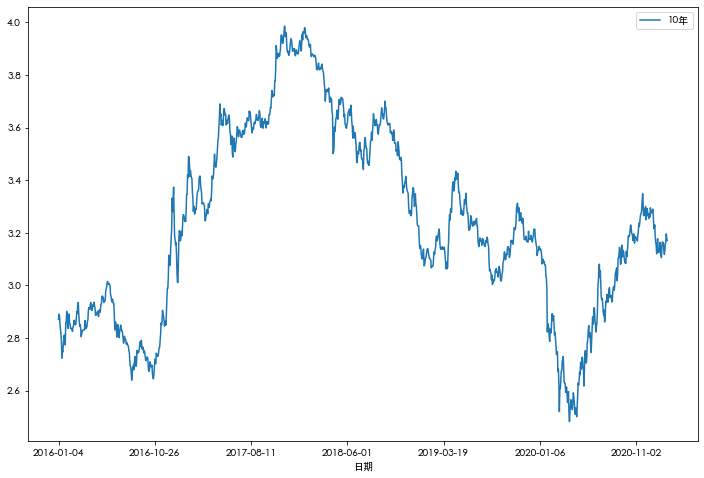

In [106]:

bond_yield.sort_values(by='日期').plot(x='日期', y='10年', figsize=(12, 8))

- When confidence is high, prices for the 10-year drops and yields rise. This is because investors feel they can find higher returning investments elsewhere and do not feel they need to play it safe.

- But when confidence is low, bond prices rise and yields fall, as there is more demand for this safe investment.